<a href="https://colab.research.google.com/github/jrukundo256/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Jonathan Rukundo



## Project Overview

#### A sales prediction for food items sold at various stores

## Load and Inspect Data

In [142]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
# Use Pandas to read the sales prediction data set into Google Colab
import pandas as pd
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [144]:
# Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

**Q1: A1) How many rows are there?**
- Your Answer:
  - `8523`

**Q1: A2) How many columns are there?**
- Your Answer:
  - `12`

In [146]:
# What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [147]:
# Are there duplicates?
# If so, drop any duplicates.
duplicated_rows_sum = df.duplicated().sum()
print(f'There are {duplicated_rows_sum} duplicates')

There are 0 duplicates


In [148]:
# Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

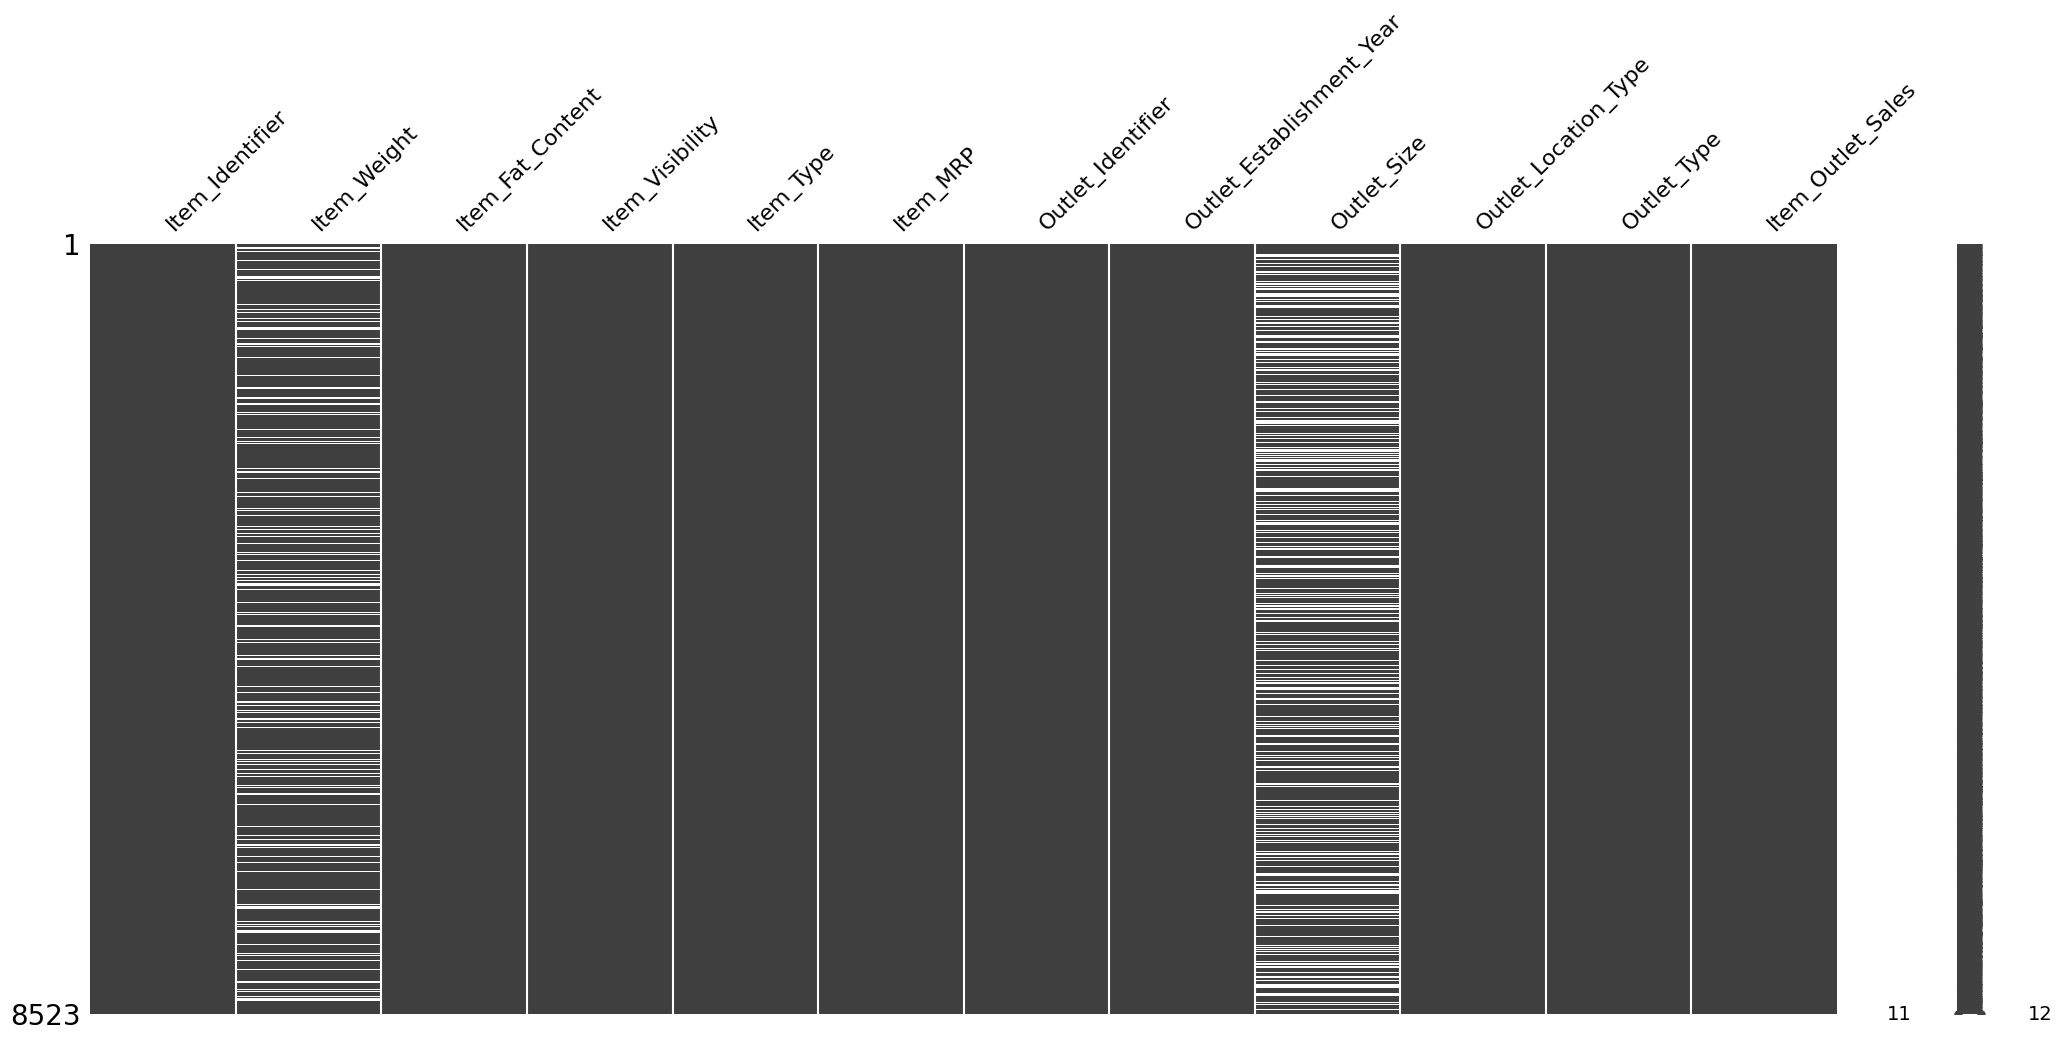

In [149]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

In [150]:
# Address the missing values by using a placeholder value.
# Fill null values under Outlet_Size with MISSING
df['Outlet_Size'] = df['Outlet_Size'].fillna("MISSING")
df['Outlet_Size']

0        Medium
1        Medium
2        Medium
3       MISSING
4          High
         ...   
8518       High
8519    MISSING
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object

In [151]:
# Fill null values under Item_Weight with 0.0
df['Item_Weight'] = df['Item_Weight'].fillna(0.00)
df['Item_Weight'].head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7     0.000
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [152]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

> Find and fix any inconsistent categories of data

In [153]:
# Save a list of object columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [154]:
# Check the nunique for just the object cols
df[obj_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [155]:
# Remake the list of object columns (considering only those with fewer columns <= 16)
new_obj_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Identifier', 'Item_Type']

# loop through the list of string columns
  # print the value counts for the column
  # Print an empty line for readability
for col in new_obj_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Outlet_Size
Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Value Counts for Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Value Counts for Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Bakin

In [156]:
# Item_Fat_Content seems to have a number of inconsistencies

# Replace "LF" with "Low Fat"
# Replace "low fat" with "Low Fat"
# Replace "reg" with "Regular"

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [157]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)
# Save a list of object columns
num_cols = df.select_dtypes('number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis



In [158]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns

#### Histograms to view the distributions of numerical features in the dataset.



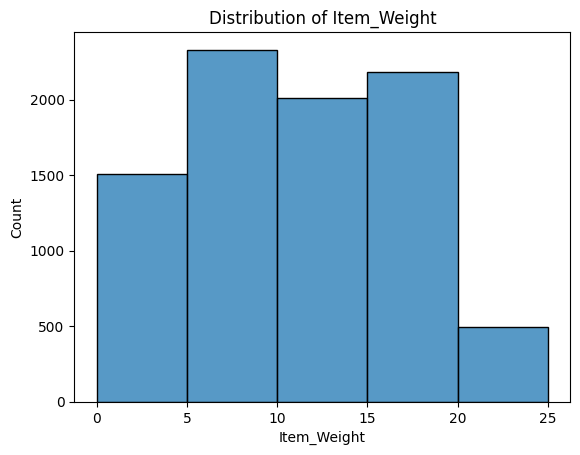

In [159]:
# Histogram to view the distribution of Item_weight
ax = sns.histplot(data = df, x = 'Item_Weight', binwidth = 5)
ax.set(title = 'Distribution of Item_Weight');

> From the above histogram, we see that most items weigh less than 20 (kgs).

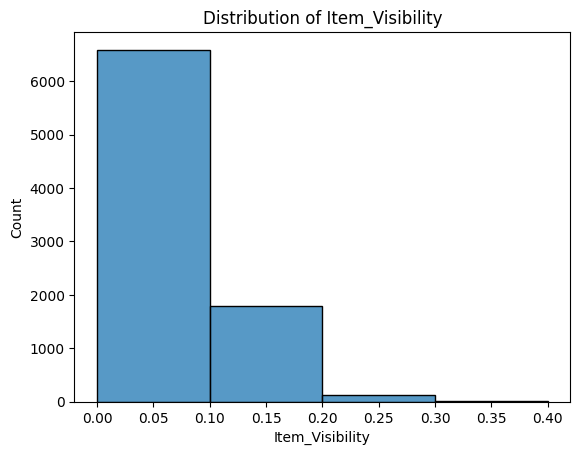

In [160]:
# Histogram to view the distribution of Item_Visibility
ax = sns.histplot(data = df, x = 'Item_Visibility', binwidth = 0.1)
ax.set(title = 'Distribution of Item_Visibility');

> Our histogram reveals that the majority of items exhibit visibility values below 0.3, with a significant portion even falling below 0.1. Additionally, a noteworthy count of items falls within the visibility range of 0.1 to 0.2, while only a minimal number fall between 0.2 and 0.3.

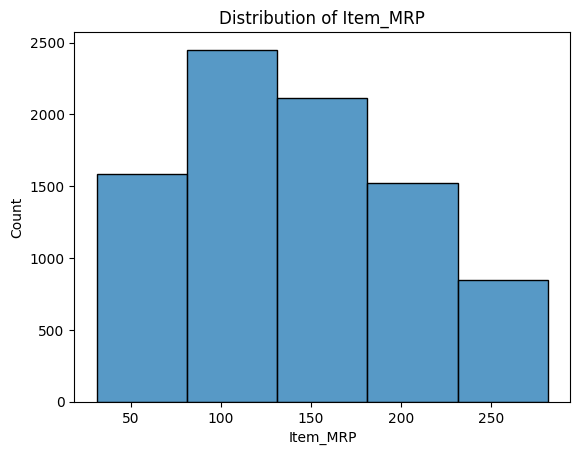

In [161]:
# Histogram to view the distribution of Item_MRP
ax = sns.histplot(data = df, x = 'Item_MRP', binwidth = 50)
ax.set(title = 'Distribution of Item_MRP');

> Our histogram reveals that the majority of items have MRP values under 200, while only a minimal number fall above 200.

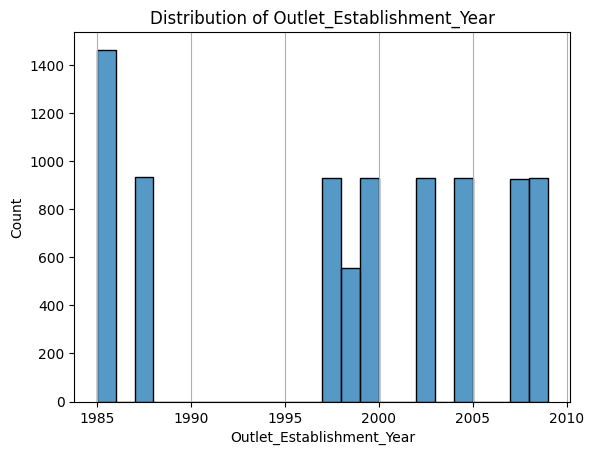

In [162]:
# Histogram to view the distribution of Outlet_Establishment_Year
ax = sns.histplot(data = df, x = 'Outlet_Establishment_Year', binwidth = 1)
ax.grid(axis = 'x');
ax.set(title = 'Distribution of Outlet_Establishment_Year');

> Out histogram shows that most outlets were established in 1985. It seems like very little outlets were estabished within the 90's.

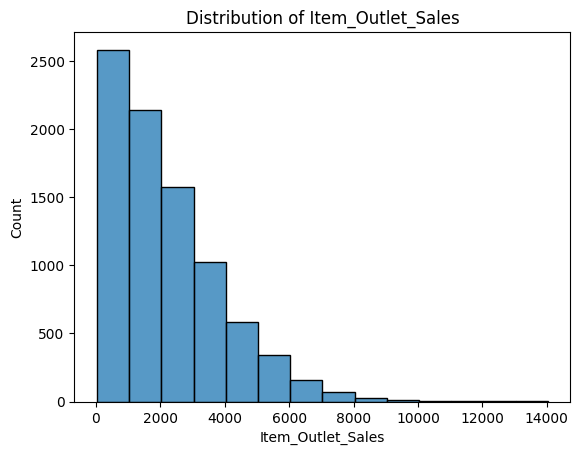

In [163]:
# Histogram to view the distribution of Item_Outlet_Sales
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales', binwidth = 1000)
ax.set(title = 'Distribution of Item_Outlet_Sales');

> Out histogram shows that most outlets' sales are under 4000. There is a very small number of outlets with sales abover 8000.

#### Boxplots to view statistical summaries of numerical features in your dataset.

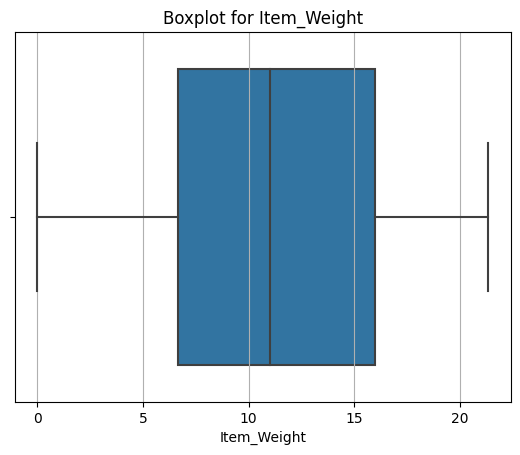

In [164]:
# Horizontal boxplot for Item_Weight
ax = sns.boxplot(data = df, x = "Item_Weight")
ax.grid(axis = 'x');
ax.set(title = 'Boxplot for Item_Weight');

> The distribution of item weights is somewhat positively skewed which might indicate a concentration of weights on the higher end.

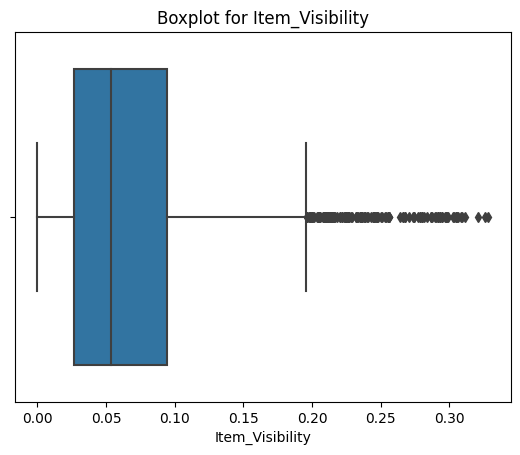

In [165]:
# Horizontal boxplot for Item_Visibility
ax = sns.boxplot(data = df, x = "Item_Visibility")
ax.set(title = 'Boxplot for Item_Visibility');

> The distribution of items' visibility is positively skewed which might indicate that most items have a visibility on the higher end. There are also several outliers.

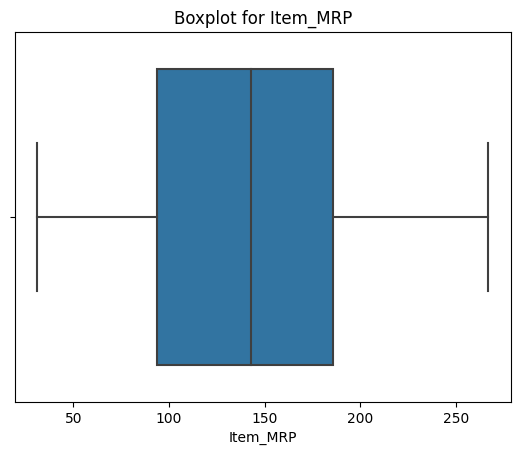

In [166]:
# Horizontal boxplot for Item_MRP
ax = sns.boxplot(data = df, x = "Item_MRP")
ax.set(title = 'Boxplot for Item_MRP');

> The distribution is negatively skewed, indicating that most retail prices are on the lower end. There are no outliers.

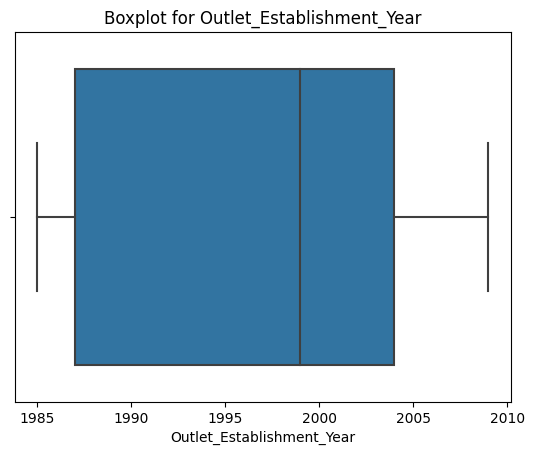

In [167]:
# Horizontal boxplot for Outlet_Establishment_Year
ax = sns.boxplot(data = df, x = "Outlet_Establishment_Year")
ax.set(title = 'Boxplot for Outlet_Establishment_Year');

> The distribution is negatively skewed, indicating that most outlets were established in the earlier years.

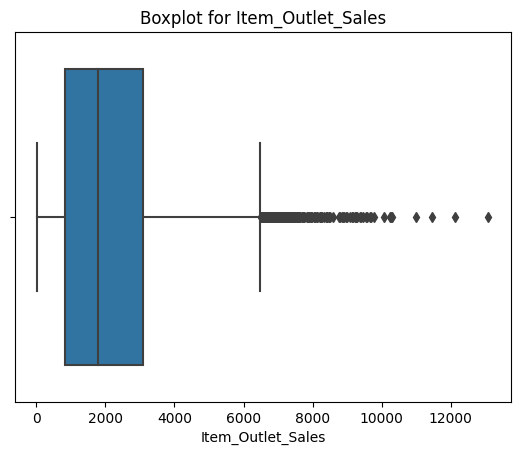

In [168]:
# Horizontal boxplot for Item_Outlet_Sales
ax = sns.boxplot(data = df, x = "Item_Outlet_Sales")
ax.set(title = 'Boxplot for Item_Outlet_Sales');

> The distribution is positively skewed, indication that most outlet sales are on the upper end. There is a number of outliers.

#### Countplots to view the frequency of each class of categorial features in your dataset.

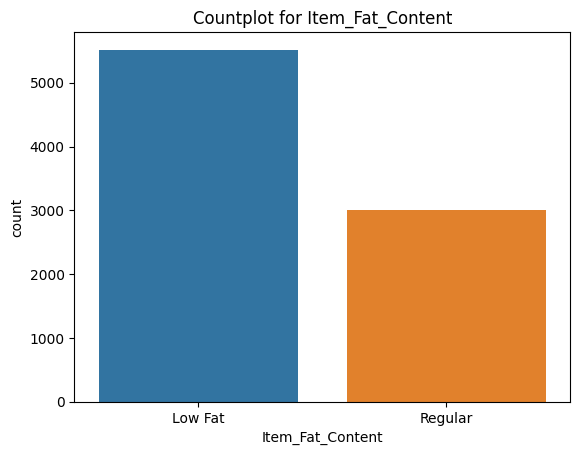

In [169]:
# Countplot for Item_Fat_Content
ax = sns.countplot(data = df, x = 'Item_Fat_Content')
ax.set_title("Countplot for Item_Fat_Content");

>  We see that Items with low fat are more prevalent that those with regular fat.

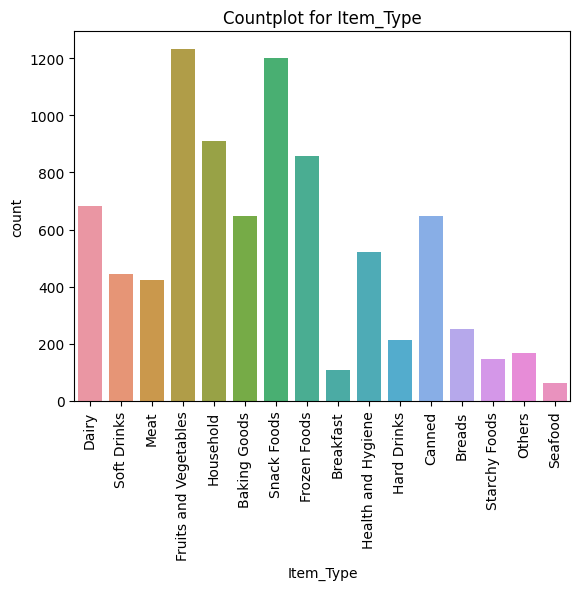

In [170]:
# Countplot for Item_Fat_Content
ax = sns.countplot(data = df, x = 'Item_Type')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Countplot for Item_Type");

> Fruits and vegetables are more prevalent than other items. Snacks follow next in the pecking order. Items such as seafood and breakfast have a very low prevalence.

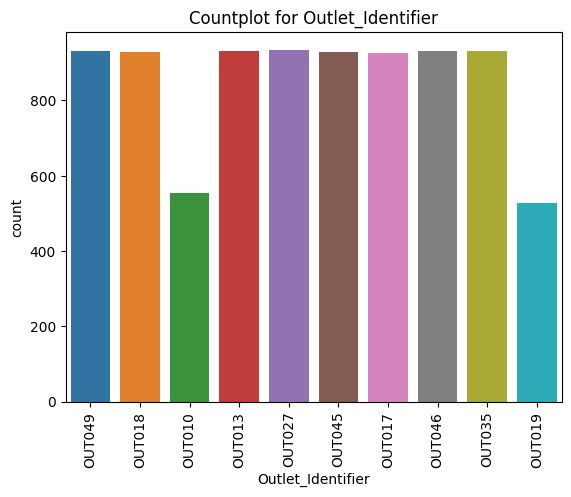

In [171]:
# Countplot for Outlet_Identifier
ax = sns.countplot(data = df, x = 'Outlet_Identifier')
ax.tick_params(axis = 'x', rotation = 90);
ax.set_title("Countplot for Outlet_Identifier");

> Almost all outlet identifiers have a similar frequency with the exceptio of OUT010 and OUT019 which fall short compared to the rest.

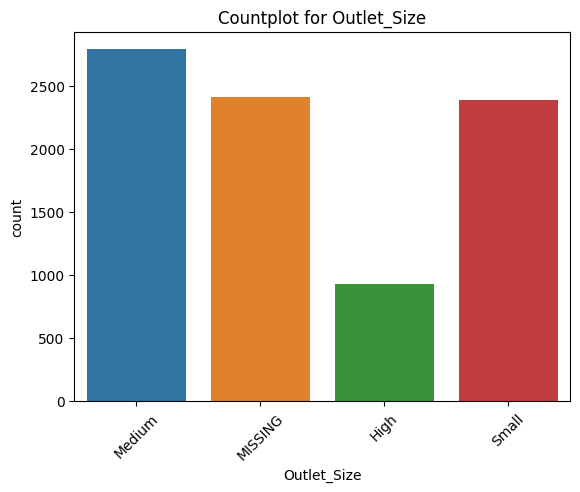

In [172]:
# Countplot for Outlet_Size
ax = sns.countplot(data = df, x = 'Outlet_Size')
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title("Countplot for Outlet_Size");

> A relatively small number of outlets have a high outlet size compared to the rest. Most outlets have a medium outlet size, closely followed by those with a small outlet size.

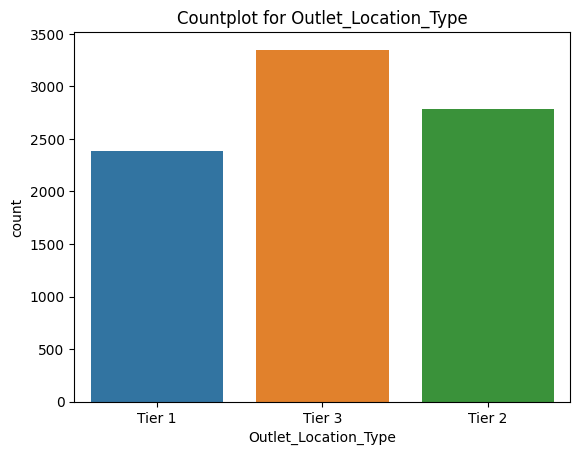

In [173]:
# Countplot for Outlet_Location_Type
ax = sns.countplot(data = df, x = 'Outlet_Location_Type')
ax.tick_params(axis = 'x');
ax.set_title("Countplot for Outlet_Location_Type");

> Most outlets have a Tier 3 location types and the least number have Tier 1 locations.

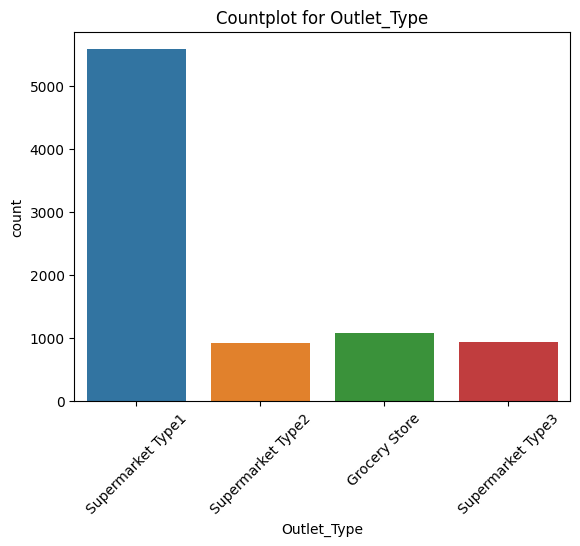

In [174]:
# Countplot for Outlet_Type
ax = sns.countplot(data = df, x = 'Outlet_Type')
ax.tick_params(axis = 'x', rotation = 45);
ax.set_title("Countplot for Outlet_Type");

>The highest number of outlets, (big margin compared to the rest) are classified as Supermarket Type1.

> Heatmap to view the correlation between features.

In [175]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.52,-0.05
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.52,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.05,-0.13,0.57,-0.05,1.00


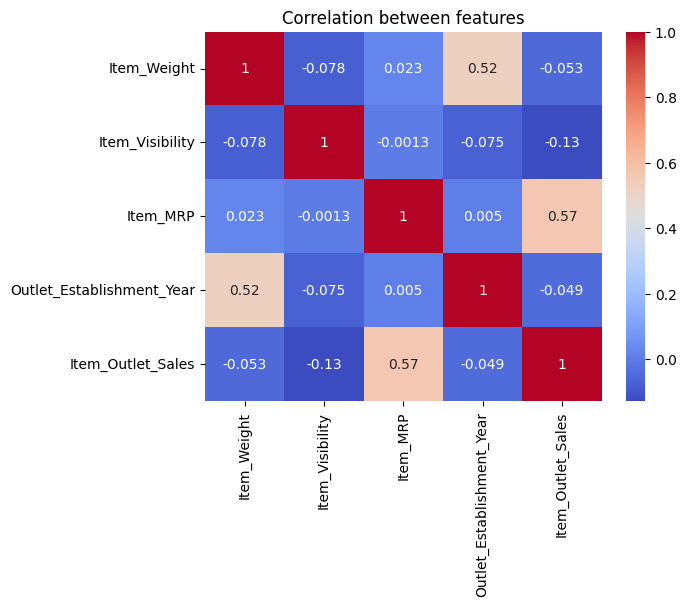

In [176]:
# Make heatmap to view correlations between features
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True);
ax.set_title("Correlation between features");

> The highest correlation is 0.57, indicating a moderate positive correlation between retail price and outlet sales. This is further highlighted by the scatterplot below.

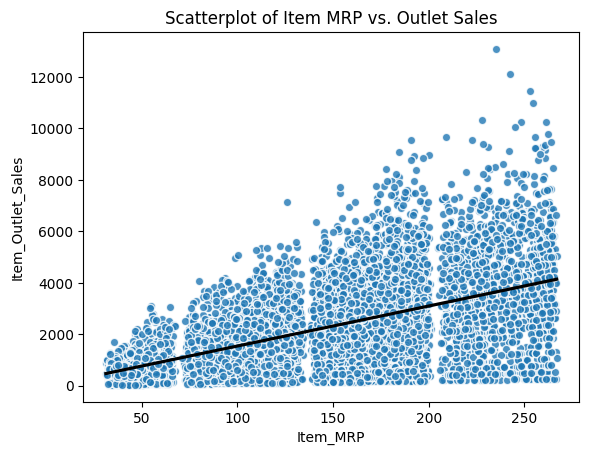

In [177]:
# sns.regplot to visulize the relationship between Item_Outlet_Salets and item_MRP
line_kws = dict(color = 'black')
scatter_kws = dict(edgecolor='white')

ax = sns.regplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales", line_kws=line_kws, scatter_kws=scatter_kws);
ax.set_title("Scatterplot of Item MRP vs. Outlet Sales");

In [178]:
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Feature Inspection
